### Understanding Customer Churn
- Customer Churn refers to the percentage of customers who have (or likely) to stop using a certain service, product, or subscription.
- Churn could also refer to the customers who have ceased to engage with the company's product or service for a certain period of time even though they have not left, those who have cancelled thier subscriptions, or thouse who have stopped making purchases.
- For the purpose of the dataset used in this project, customer churn refers to the cusotmers who have left within the last month.

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib as plt
from sklearn import preprocessing

In [2]:
# Getting the data 
customer_data = pd.read_csv("../Datasets/telco-customer-churn.csv") 
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
customer_data.shape

(7043, 21)

In [4]:
# The dataset has 21 columns associated with the subscription behavior of the company's customer
# Then, having a deep look at these columns
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# The above results shows that we have 19 variables (or features) that can be used to predict customer churn.
# Let's find the actual number of customers in the dataset who have churned

customer_data["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [6]:
# Looking at the results above, there's only a small number of customers who have churned. As a result, we will need to
# perform some feature engineering in order to get some balanced dataset for use in the prediction of churn.

### Exploratory Data Analysis
Exploratory data analysis for better understanding of the features relating to customer churn

In [7]:
# Understanding the demographic features
# The features include; gender, SeniorCitizen, Partner, and Dependents

demo_features = ["gender", "SeniorCitizen", "Partner", "Dependents"]
demo_features

['gender', 'SeniorCitizen', 'Partner', 'Dependents']

<Figure size 2000x400 with 0 Axes>

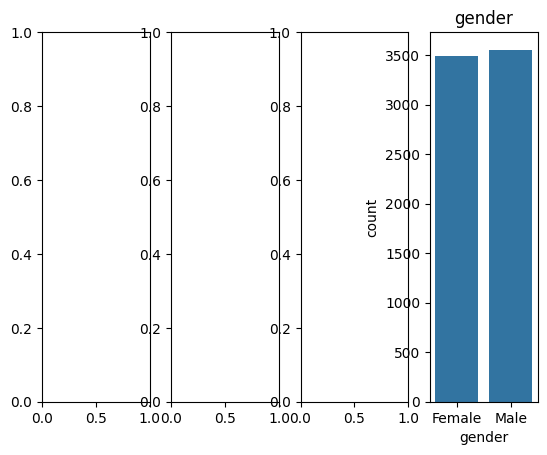

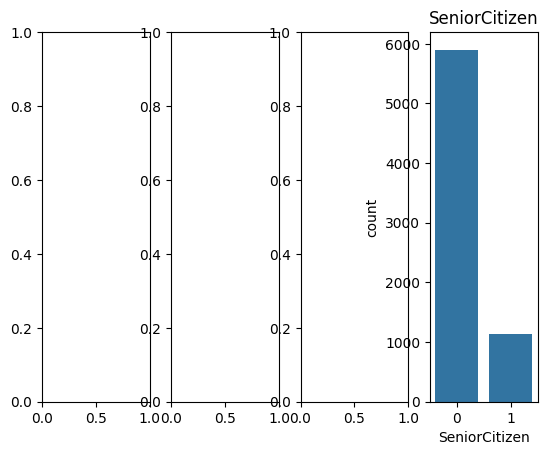

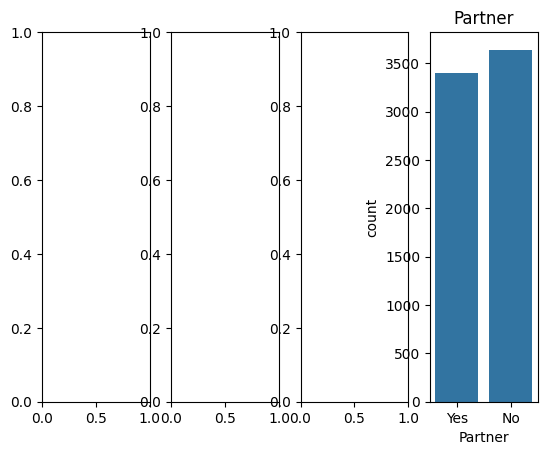

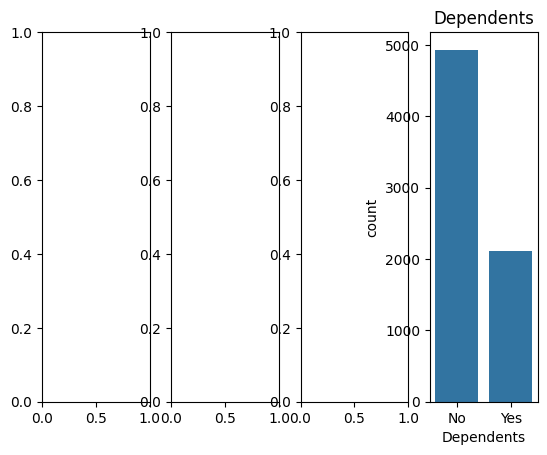

In [8]:
# Setting the size of the chart
plt.pyplot.figure(figsize=(20,4)) 

for ind, column in enumerate(demo_features):
    fig = plt.pyplot.subplots(1, len(demo_features)) 
    sns.countplot(x=str(column), data=customer_data)
    plt.pyplot.title("{}".format(column))


Observation
- Most of the customers young
- Gender and marital status features are equally distributed on the data


<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

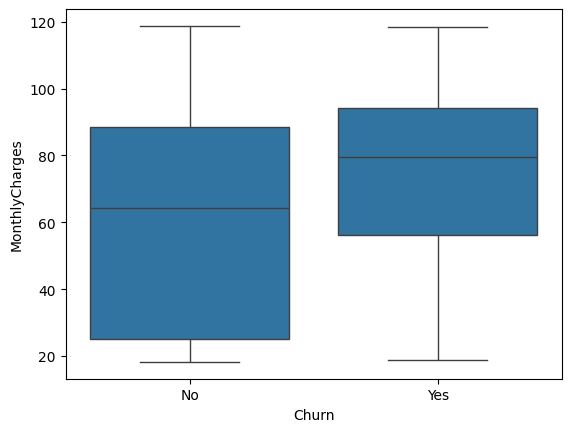

In [9]:
# Checking whether there is a relationship between customer churn and monthly charges
sns.boxplot(
    x="Churn",
    y="MonthlyCharges",
    data=customer_data
)

Observations
- There is a relationship between customer churn and the monthly charges
- The customers who are churned have a high median of monthly charge compared to the customers 
who renewed

In [10]:
# Checking where there is a relationship between customer churn and other features include...
# InternetService, TechSupport, Contract, and OnlineBackup

other_features = ["TechSupport", "Contract", "InternetService", "OnlineBackup"]
other_features

['TechSupport', 'Contract', 'InternetService', 'OnlineBackup']

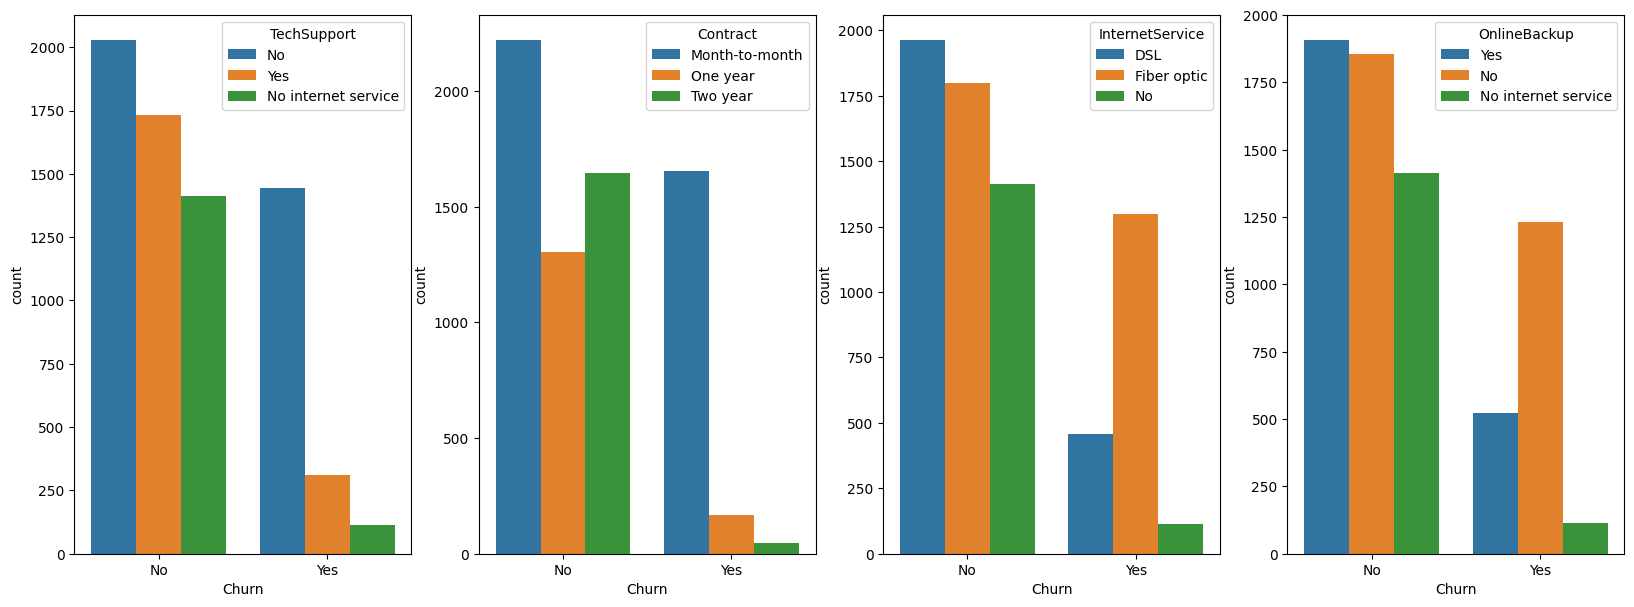

In [16]:
plt.pyplot.figure(figsize=(20,7))

for index, column in enumerate(other_features):
    ax = plt.pyplot.subplot(1, len(other_features), index + 1)
    sns.countplot(
        x="Churn",
        data=customer_data,
        hue=str(column)
    )

Observation
- TechSupport: Customers who did not receive Tech Support churned more than those who received tech support. This would mean that customers
churned because they were not able to fix simple technical issues regarding thier internet service. This made them to stop using the service
- Contract: Customers with monthly subsriptions churned more compared to those with one-year or two-year subscriptions. THis would make sense 
as the shorter period of subscriptions gives them the flexibility of cancelling the service or not renewing the service the following month.
- InternetService: Customers with fiber optic internet service churned more than others. This is because fiber optic is a bit expensive compared to DSL.


### Data Preprosessing

In [12]:
# Looking at the data
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [13]:
# Choosing categorical features to work with
categorical_features = ['TotalCharges','MonthlyCharges','SeniorCitizen','tenure']
categorical_features

['TotalCharges', 'MonthlyCharges', 'SeniorCitizen', 'tenure']

In [14]:
features = customer_data.drop(categorical_features, axis=1)
features.head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
